## First Assignment of the Applied Machine Learning Course
### By: Artopoulos Georgios t8200016

After downloading and  getting familiar with the data from [Inside AirBnB](http://insideairbnb.com), we will try to answer the following :

- Neighbourhood Listings in Descending Order
- Neighbourhood Prices in Descending Order
- Availability per Day
- Reviews, Occupancy per Listing, Average Income
- Listings per Room Type
- Prices per Day
- Listings per Host
- Visualize Listings


### Importing the necessary libraries to complete the above tasks:

`pandas` will be used throughout the assigment to load the necessary data and create dataframes as well as for data manipulation and analysis

`numpy` will be used for the creation of arrays, replacing values in the dataframes and statistics

`matplotlib` will be used for the creation of different kinds of plots and graphs such as histograms, line plots and box plots

`folium` will be used for the creation of the interactive map in the last task

`CircleMarker, Polygon` will be used to create the markers and polygons in the interactive map

`ConvexHull` will be used to create an outline the interactive map

`datetime` will be used to save the current date

***Please make sure you have installed all the necessary libraries before running the code.***

In [1]:
# Importing the necessary libraries
import pandas as pd
from scipy import stats
import numpy as np
from matplotlib import pyplot as plt
import folium
from folium import CircleMarker, Polygon
from scipy.spatial import ConvexHull
import datetime

### Importing the necessary data from the csv files

We will be using pandas **.read_csv** to import the necessary data columns that will be used from the `listings.csv` and `calendar.csv` files and create the dataframes `listings` and `calendar` respectively (this was implemented after the completion of all the tasks).
Using pandas **.str.replace** we will remove the dollar sign and the comma from the `listings.price` and `calendar.price` columns and then convert them to float using **.astype(float)**.
We will also be using pandas .to_datetime to convert the `calendar.date` column to datetime format and then to date format. 
Lastly we need to import the reviews from the `reviews.csv` and we only need the `listing_id` and `date` columns for the **4th task** that will follow. This is why we took the summarized version of the `reviews.csv`.


In [2]:
# Importing the necessary data from the csv files
listings = pd.read_csv('data/listings.csv')[['id', 'name', 'host_id', 'host_name',
                                        'neighbourhood_cleansed', 'latitude', 'longitude','minimum_nights', 'room_type', 'price',
                                        'number_of_reviews']]
calendar = pd.read_csv('data/calendar.csv')[[
    'listing_id', 'date', 'available', 'price']]

# Removing the dollar sign and the comma from the price column and converting it to float
listings.price= listings.price.str.replace('$', '').str.replace(',', '').astype(float)
calendar.price= calendar.price.str.replace('$', '').str.replace(',', '').astype(float)

# Converting the date column to date format
calendar.date = pd.to_datetime(calendar.date).dt.date

# Load the reviews data and filter the latest years date
reviews = pd.read_csv('data/reviews.csv')

# Converting the date column from the reviews to date format
reviews.date = pd.to_datetime(reviews.date)

C:\Users\geoar\AppData\Local\Temp\ipykernel_10428\358953126.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  listings.price= listings.price.str.replace('$', '').str.replace(',', '').astype(float)
C:\Users\geoar\AppData\Local\Temp\ipykernel_10428\358953126.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  calendar.price= calendar.price.str.replace('$', '').str.replace(',', '').astype(float)


## Task 1:  Neighbourhood Listings in Descending Order
For this task it is necessary to use the `neighbourhood_cleansed` column of the `listings` dataframe because it uses the same format for all the neighbourhoods unlike the
`neighbourhood` column.

Using the **.value_counts()** method we can count the number of listings per neighbourhood (this method shorts the values in descending order by default).

In [3]:
# Counting the number of listings per neighbourhood
listings.neighbourhood_cleansed.value_counts()

ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ              2416
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ                 1122
ΝΕΟΣ ΚΟΣΜΟΣ                          980
ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ             979
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ     817
ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ                      583
ΠΑΓΚΡΑΤΙ                             511
ΑΜΠΕΛΟΚΗΠΟΙ                          452
ΚΟΛΩΝΑΚΙ                             425
ΘΗΣΕΙΟ                               386
ΑΚΡΟΠΟΛΗ                             386
ΠΕΤΡΑΛΩΝΑ                            352
ΚΕΡΑΜΕΙΚΟΣ                           343
ΚΥΨΕΛΗ                               271
ΣΤΑΔΙΟ                               252
ΓΟΥΔΙ                                230
ΙΛΙΣΙΑ                               216
ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ                     180
ΝΙΡΒΑΝΑ                              174
ΠΑΤΗΣΙΑ                              166
ΛΥΚΑΒΗΤΤΟΣ                           162
ΖΑΠΠΕΙΟ                              161
ΑΝΩ ΚΥΨΕΛΗ                           119
ΓΚΥΖΗ                                118
ΠΕΔΙΟ ΑΡΕΩΣ     

## Task 2: Neighbourhood Prices in Descending Order

For this task we will be using the `neighbourhood_cleansed` and `price` columns of the `listings`. We will group the listings by the `neighbourhood_cleansed` column using the **groupby()** function from pandas and then
aggregate the `price` column by the median, mean, standard deviation and count using the **.agg()** function. We will then sort the values in descending order by the median price with the **sort_values** and round the result in the 3rd decimal place using the **.round()** function.

In [4]:
# Grouping by the 'neighbourhood_cleansed' column and aggregating different statistics by price.
# Sorting the values in descending order by the median price
prices_per_neighbourhood = listings.groupby('neighbourhood_cleansed')['price']\
    .agg(['median', 'mean', 'std','count'])\
    .sort_values(by='median', ascending=False).round(3) # Rounding the values in the 3rd decimal place

In [5]:
prices_per_neighbourhood

,median,mean,std,count
neighbourhood_cleansed,,,,
ΡΗΓΙΛΛΗΣ,120.0,367.800,578.623,5
ΖΑΠΠΕΙΟ,114.0,224.068,641.163,161
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,104.0,140.651,229.183,2416
ΑΚΡΟΠΟΛΗ,100.0,195.345,703.322,386
ΚΟΛΩΝΑΚΙ,100.0,128.595,104.431,425
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ,90.5,120.284,104.614,1122
ΘΗΣΕΙΟ,90.0,126.492,124.177,386
ΚΕΡΑΜΕΙΚΟΣ,89.0,123.883,136.367,343
ΛΥΚΑΒΗΤΤΟΣ,75.0,104.562,87.860,162


### Observation #1

We can see that the std deviation is very high for some neighbourhoods. Especially in the neighbourhood `ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ ` we can see it is over 2000. So it is important to check for outliers in the data. We will do that with the creation of a boxplot for the `price` column in the `listings` dataframe.
This will be done using the **.boxplot()** function from pyplot.

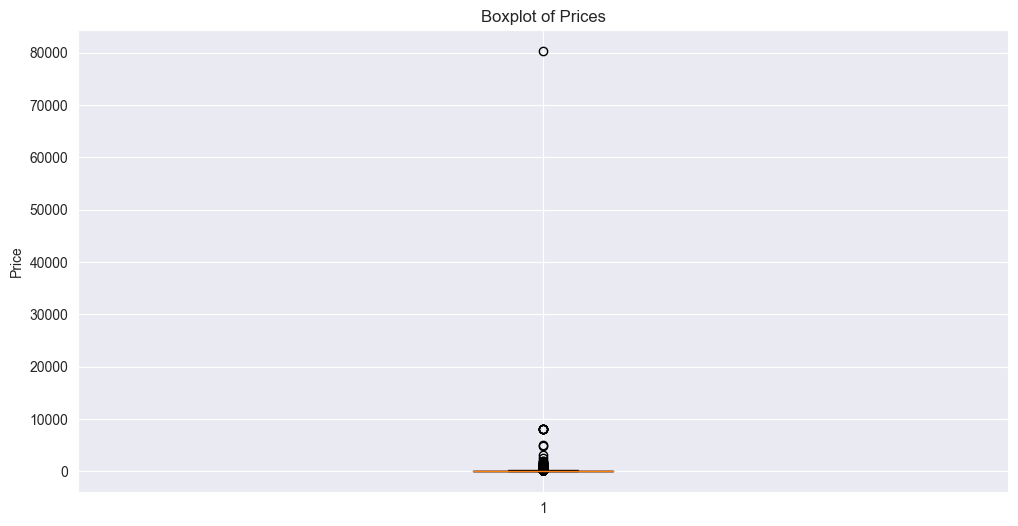

In [6]:
# Saving all the prices in a frame
l_prices = listings.price

# Creating a boxplot for the prices
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.boxplot(l_prices.values)

# Setting the title and the labels of the plot
plt.title('Boxplot of Prices')
plt.ylabel('Price')

# Showing the boxplot
plt.show()

So we can see that there are for sure ***outliers*** in the data so we have to proceed with caution when using prices in our analysis because different situations require different approaches
For example, we might need to replace them with the median prices or we might need to remove them completely from the data, depending on the situation.


One last thing to check is if the data is normally distributed so that we choose the correct statistical tests for our analysis. To do that we will use the Anderson-Darlin test from the `scipy` library.


In [7]:
result = stats.anderson(calendar['price'])
if result.statistic < result.critical_values[2]:
    print("The data appears to be normally distributed.")
else:
    print("The data does not appear to be normally distributed.")

The data does not appear to be normally distributed.


So now we know that the data is not normally distributed.

(**Side note**: I totally didn't complete all the tasks without realizing that the data is not normally distributed and then had to go back and change some things after i finished)

## Task 3: Availability per Day

In this task we need to create a plot with the number of listings available per day, on the $y$ axis, and the date, on the $x$ axis.
To complete this ,first, we need to calculate the number of listings available per day. This information is stored in the `calendar` dataframe in the `available` and `date` columns. After filtering the `calendar` dataframe for available listings **('t')** we group by date  using `groupby()` and count the number of available listings for each day with `count()`. We then create a line plot using the **.plot()** function and **linestyle='-'** . We then label the axes and add a title to the plot for clarity. We also add a grid to the plot for better visualization. Finally we show the plot to visualize the availability of listings over time

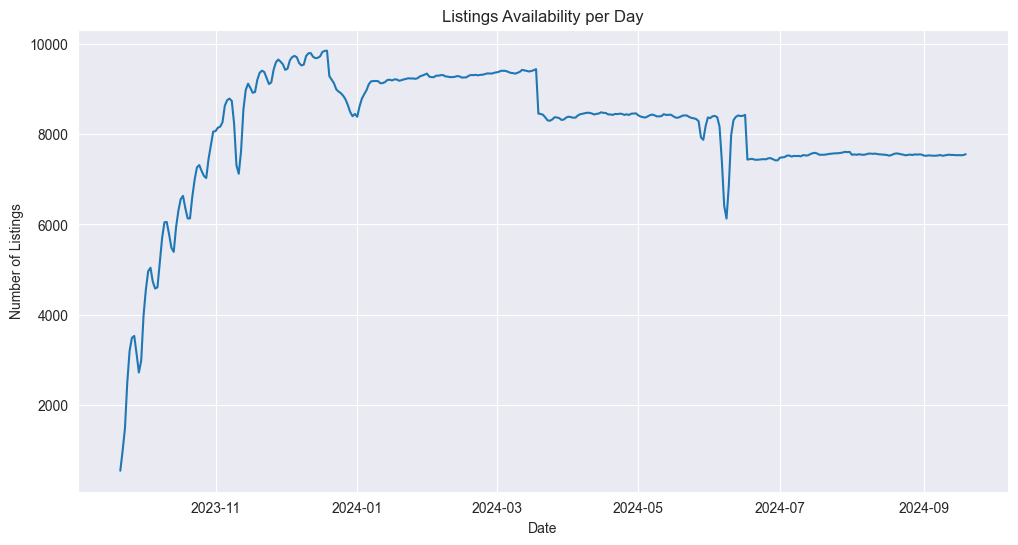

In [8]:
# Calculate the number of listings available per day
listings_available = calendar[calendar.available == 't'].groupby('date')['listing_id'].count()

# Create a plot
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

# Create a line plot using the date as the x-axis and the number of available listings as the y-axis.
plt.plot(listings_available.index, listings_available.values, linestyle='-')

# Label the x and y axes, and add a title to the plot for clarity.
plt.xlabel('Date')
plt.ylabel('Number of Listings')
plt.title('Listings Availability per Day')

# Display a grid.
plt.grid(True)

# Show the plot.
plt.show()

## Task 4: Reviews, Occupancy per Listing, Average Income

For this task we need to complete the following steps:

**a)** Create a histogram showing the number of reviews per listing. The histogram should bin the number of reviews, from the smallest amount of reviews in a listing, to the maximum number of reviews in a listing rounded up to the closest hundred.

**b)** Calculate the average occupacy per listing per month. To calculate that, find the average reviews per month and assume that half of the bookings result in reviews.

**c)** Then, assuming that each booking is for a three nights stay, calculate the average income per month, using the average price charged throughout all listings.


#### 4a) Histogram of the number of reviews per listing

To create the histogram we obtain the reviews per listing from the `number_of_reviews` column of the `listings` dataframe. We then find the minimum and maximum number of reviews per listing using the **.min()** and **.max()** functions that are need for the histogram bins. After that we round up the maximum number of reviews to the closest hundred using the following formula: `(max_reviews // 100 + 1) * 100` to have even bins. We, also create the histogram using the **.hist()** and create the bins using the `.arrange()` function from numpy.
 We then label the axes and add a title to the plot for clarity and add a grid to the plot. Finally we show the plot to visualize the number of reviews per listing.


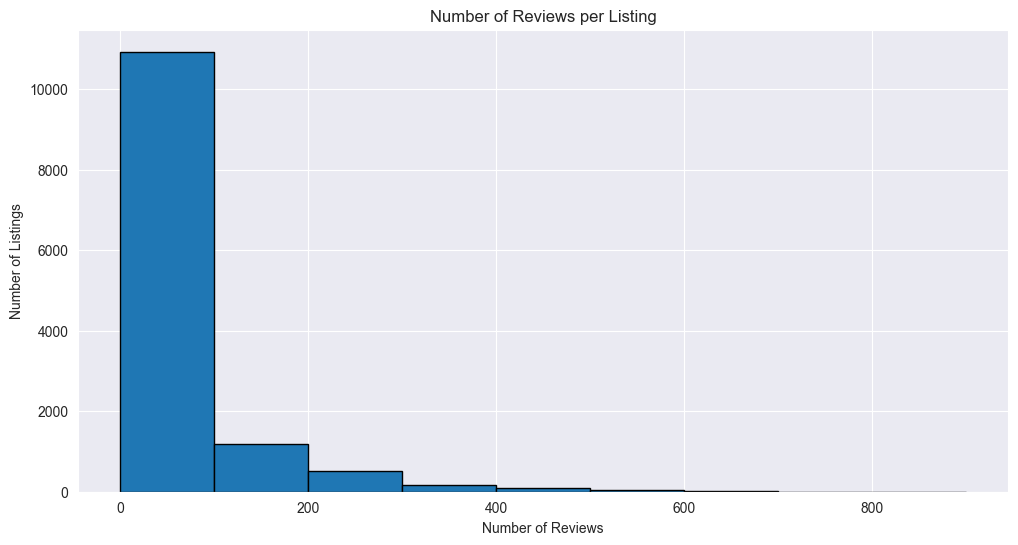

In [9]:
# Calculate the number of reviews per listing
reviews_per_listing = listings['number_of_reviews']

# Find the minimum and maximum number of reviews
min_reviews = reviews_per_listing.min()
max_reviews = reviews_per_listing.max()

# Round up the maximum number of reviews to the closest hundred
max_reviews = (max_reviews // 100 + 1) * 100

# Create a plot
plt.figure(figsize=(12, 6))

# Create the histogram
plt.hist(reviews_per_listing, bins=np.arange(min_reviews, max_reviews + 1, 100), edgecolor='black')

# Label the axes and add a title
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Listings')
plt.title('Number of Reviews per Listing')

# Show the plot
plt.grid(True)
plt.show()

#### 4b) Average occupancy per listing per month

To calculate the average occupancy per listing per month we first need to calculate the average reviews per month. We do that by taking the reviews from the latest year (21/9/2022 to 21/9/2023 because the latter one is the last day we have available data) by finding the ending date using the **.max()** function and subtracting one year from it using the **pd.DateOffset(years=1)** function to find the starting date. We then filter the `reviews` dataframe for the reviews of the past year using and change the `date` column to show only the year and month with the **.dt.to_period('M')** function. After all that group by the year and month of the review and count the number of reviews per month using the **.count()** function. Using the **.sum()** function we find the total number of reviews per month for each listing and the devide by 12 to find the average reviews. We then multiply the average reviews per month by 2 to get the occupancy per month and use the **.mean()** function to find the average occupancy per listing per month. We then print the result to the screen.

In [10]:
# Saving the last available date in the calendar
latest_date= reviews['date'].max()

# Finding the date one year ago
one_year_ago = latest_date - pd.DateOffset(years=1)

# Filtering the reviews dataframe for the reviews of the past year
latest_reviews = reviews[reviews['date'] >= one_year_ago]

# Creating a copy
latest_reviews = latest_reviews.copy()

# Creating a new column with the year and month of the review
latest_reviews['date'] =  latest_reviews['date'].dt.to_period('M')

# Group by 'listing_id' and 'year_month', then count the reviews
reviews_per_month = latest_reviews.groupby(['listing_id', 'date'])['listing_id'].count().reset_index(name='count')

# Group by 'listing_id' and find the sum of the reviews for each listing
total_reviews = reviews_per_month.groupby('listing_id')['count'].sum().reset_index()

# Find the average reviews per month by deviding the total reviews by 12
total_reviews['avg_reviews_per_month'] = total_reviews['count'] / 12

# Multiply the average reviews per month by 2 to get the occupancy per month
total_reviews['occupancy_per_month'] = total_reviews['avg_reviews_per_month'] * 2

# Find the average occupancy per listing per month

average_occupancy_per_month = total_reviews['occupancy_per_month'].mean()

average_occupancy_per_month


3.0967595976471403

#### 4c) Average income per month

There are 2 ways to calculate the average income per month on is based on calculating the average price of all listings using the prices that are in the `price` column of `listings` dataframe the and the other is based on calculating the average price using the prices that are in the `price` column of `calendar` dataframe. We will calculate both and see the results.

Also we need to take into account the ***obseravtion*** that we made in **Task 2** about the outliers in the data. So first we need to check if the `price` column in the `calendar` has outliers and we will do that by checking the standard deviation and by creating a box plot.


In [11]:
# Calculate the std of the prices in the calendar dataframe
std_price_calendar = calendar.price.std()

std_price_calendar

799.4942039997198

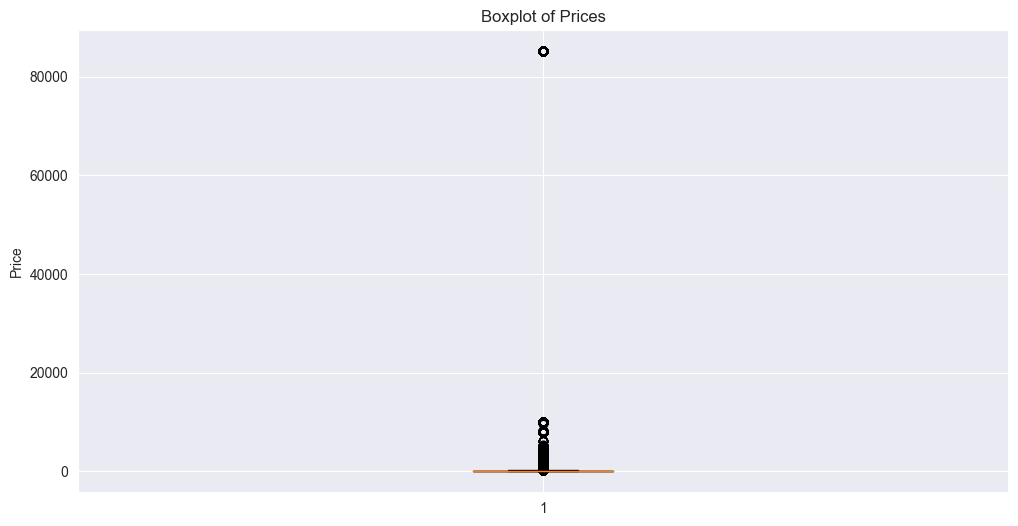

In [12]:
# Create a boxplot for the prices in the calendar dataframe
# Saving all the prices in a frame
c_prices = calendar.price

# Creating a boxplot for the prices
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.boxplot(c_prices.values)

# Setting the title and the labels of the plot
plt.title('Boxplot of Prices')
plt.ylabel('Price')

# Showing the boxplot
plt.show()

### Observation 2

We come to the conclusion both from the number of the standard deviation and the boxplot that there are outliers in the `price` column of the `calendar` dataframe. For this task it would be better to remove the outliers from `calendar.price` and from `listings.price` because the results have to do with income data and the outliers would not help provide clear information about them.

To deal with the outliers we will use the modified z-score method that is used for non normal distributions. Modified Z-score is a statistical measure that quantifies how far a particular data point is from the median of a dataset, taking into account the variability in the data. We will remove the outliers that have an absolute modified z-score greater than 3.5 because we need to be strict with the outliers in the case of income data.

In [13]:
# Calculate the median of the prices in the listings and calendar dataframe
median_price_listings = listings.price.median()
median_price_calendar = calendar.price.median()

# Calculate the median absolute deviation of the prices in the listings and calendar dataframe
mad_price_listings = np.median([np.abs(listings['price'] - median_price_listings)])
mad_price_calendar = np.median([np.abs(calendar['price'] - median_price_calendar)])

# Calculate the modified z-score of the prices in the listings and calendar dataframe
modified_z_scores_listings = 0.6745 * (listings['price'] - median_price_listings) / mad_price_listings
modified_z_scores_calendar = 0.6745 * (calendar['price'] - median_price_calendar) / mad_price_calendar

# Remove the outliers from the listings and calendar dataframe
listings_removed_outliers = listings[modified_z_scores_listings.abs() <= 3.5]
calendar_removed_outliers = calendar[modified_z_scores_calendar.abs() <= 3.5]

Now we proceed with the first way to calculate the average income per month which is based on the average price of all listings using the prices that are in the `price` column of `listings_removed_outliers` dataframe. We calculate the average price using the **.mean()** function and then we multiply it with the average occupancy per month that we calculated in **Task 4b** and by 3 because we assume that each booking is for a three nights stay. We then round the result to the 3rd decimal and print it.

In [14]:
#calculate the average price charged throughout all listings with the outliers removed

average_price_listings = listings_removed_outliers['price'].mean()

#calculate the average income per month rounded to the 3rd decimal

average_income_per_month_listings = (average_price_listings*average_occupancy_per_month*3).round(3)

# print the average income per month
average_income_per_month_listings

733.742

For the second way to complete the task we will calculate the average price using the prices that are in the `price` column of `calendar_removed_outliers` dataframe. We calculate the average price using the **.mean()** function and then we multiply it with the average occupancy per month that we calculated in **Task 4b** and by 3 because we assume that each booking is for a three nights stay. We then round the result to the 3rd decimal and print it.

In [15]:
#calculate the average price charged throughout the calendar dataframe with the outliers removed

average_price_calendar = calendar_removed_outliers['price'].mean()

#calculate the average income per month rounded to the 3rd decimal

average_income_per_month_calendar = (average_price_calendar*average_occupancy_per_month*3).round(3)

# print the average income per month
average_income_per_month_calendar

737.975

## Task 5: Listings per Room Type

For task number 5 there are 2 sub tasked that need to be completed

a) Calculate the number of listings per room type in absolute numbers, and also in percentages (the percentage of listings for each particular room type)

b) Show the number of listings per neighrbourhood and room type.


#### 5a) Calculate the number of listings per room type in absolute numbers, and also in percentages

To calculate the number of listings per room type we use the **.value_counts()** function on the `room_type` column of the `listings` dataframe. We then calculate the percentage for each room type by dividing the number of listings per room type with the total number of listings and multiplying by 100. We then round the result to the 3rd decimal and print it.

In [16]:
# Calculate the number of listings per room type

listings_per_room_type = listings.room_type.value_counts()

# Calculate the percentage for each room type
percentage_per_room_type = ((listings_per_room_type / listings_per_room_type.sum()) * 100).round(3)

# Combine the counts and percentages into a DataFrame
room_type_counts_and_percentages = pd.DataFrame({'Count': listings_per_room_type, 'Percentage': percentage_per_room_type})

# Print the DataFrame
room_type_counts_and_percentages

,Count,Percentage
Entire home/apt,11652,89.942
Private room,1113,8.591
Hotel room,105,0.810
Shared room,85,0.656


#### 5b) Show the number of listings per neighrbourhood and room type

To calculate the number of listings per neighbourhood and room type we use the **.groupby()** function on the `neighbourhood_cleansed` and `room_type` columns of the `listings` dataframe. We then use the **.count()** function to count the number of listings per neighbourhood and room type. We then reset the index of the dataframe with the `.reset_index()` to make it accessible for further operations and rename the column `id` to `count`. We then sort the values in descending order and print the dataframe.

In [17]:
# Group and count listings by neighborhood and room type
# Rename the column 'id' to 'count' and sort the values in descending order
listings_per_neighbourhood_and_room_type = listings.groupby(['neighbourhood_cleansed', 'room_type'])['id'].count()\
    .reset_index().rename(columns={'id': 'count'})

# Print the DataFrame
listings_per_neighbourhood_and_room_type

,neighbourhood_cleansed,room_type,count
0,1Ο ΝΕΚΡΟΤΑΦΕΙΟ,Entire home/apt,55
1,ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ,Entire home/apt,33
2,ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ,Private room,5
3,ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,Entire home/apt,686
4,ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,Hotel room,4
...,...,...,...
106,ΣΤΑΔΙΟ,Private room,11
107,ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ,Entire home/apt,73
108,ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ,Hotel room,4
109,ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ,Private room,4


## Task 6: Prices per Day

We need to create a table with the average price per listing per day and draw a graph visualizing the table.

For this task it is important to remember ***observetions #1 and #2*** from **Tasks 2 and 4c** and handle the outliers in the `price` column of the `calendar` dataframe. This will be done again with modified z-score but this time we will use imputation to replace the outliers with the median of the column because it allow us to address the outliers while preserving the data in its entirety and not losing any information. While in the previous task we removed the outliers because we wanted to calculate the average income per month and the outliers would not help provide clear information about it. For this task we will change the z score limit to 10 because we want our results to be more sensitive to outliers and remove the most extreme ones .

In [18]:
#using the modified z-score method calculated in task 4c replace the outliers with the median of the column
calendar_replaced_outliers = np.where(abs(modified_z_scores_calendar) > 10, calendar['price'].median(), calendar['price'])

Now we proceed with the calculation of the average price per listing per day. We make the numpy array into a dataframe with the columns `date` and `price`.
We use the **.groupby()** function on the `date` column of the `calendar_replaced_outliers` dataframe and then we use the **.mean()** function to calculate the average price per listing per day. We then round the result to the 3rd decimal and print it.

In [19]:
# Making the numpy array into a dataframe
calendar_replaced_outliers_df = pd.DataFrame({'date': calendar['date'], 'price': calendar_replaced_outliers})

# Calculate the average price per listing per day
average_price_per_listing = calendar_replaced_outliers_df.groupby('date')['price'].mean().round(3)

# Print the average price per listing per day

average_price_per_listing = pd.DataFrame(average_price_per_listing)

# Print the average price per listing per day

average_price_per_listing['price'].sort_values(ascending=False)

date
2024-06-07    101.009
2024-06-08    100.811
2024-06-09     99.574
2024-06-22     98.773
2024-06-21     98.664
               ...   
2023-11-22     83.627
2023-11-27     83.569
2023-11-28     83.563
2023-11-21     83.515
2023-11-20     83.456
Name: price, Length: 365, dtype: float64

We continue with the visualization of the table. We use the **.plot()** function on the `average_price_per_listing` dataframe with the **x** axis being the `index` (the dates) and the **y** axis being the `values` (the average prices per listing).
Then we label the axes and add a title. We also add a grid to the graph and show it.

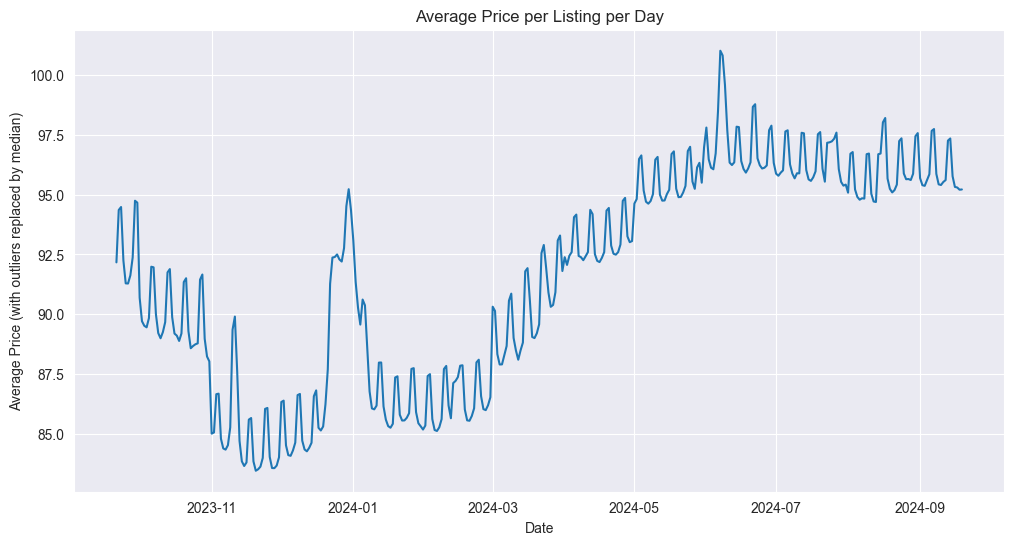

In [20]:
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.plot(average_price_per_listing.index, average_price_per_listing.values, linestyle='-')

# Label the axes and add a title
plt.xlabel('Date')
plt.ylabel('Average Price (with outliers replaced by median)')
plt.title('Average Price per Listing per Day')

# Show the plot
plt.grid(True)
plt.show()

## Task 7: Listings per Host

 Task 7 requires the creation of a table with the number of listings per host, in descending order and rank the hosts by the number of listings they have. After that we
 need to draw a graph visualizing the table.

To calculate the number of listings per host we use the **.groupby()** function on the `host_id` column of the `listings` dataframe. We then use the **.count()** function to count the number of listings per host. We then reset the index of the dataframe with the `.reset_index()` to make it accessible for further operations and rename the column `id` to `count`. We then sort the values in descending order and print the dataframe.

To rank the hosts by the number of listings they have we use the **.rank()** function on the `count` column of the `listings_per_host` dataframe. We set the `ascending` parameter to `False` to sort the values in descending order and the `method` parameter to `first` to rank the values from 1 to n. We then convert the result to an integer with the **.astype()** function and print the dataframe.


In [21]:
# Group and count listings by host
# Rename the column 'id' to 'count' and sort the values in descending order
listings_per_host = listings.groupby('host_id')['id'].count().reset_index().rename(columns={'id': 'count'}).sort_values('count', ascending=False)

# Add ranking collumn
listings_per_host['rank'] = listings_per_host['count'].rank(ascending=False, method='first').astype(int)

# Print the DataFrame
listings_per_host

,host_id,count,rank
607,20104194,114,1
2069,113548208,88,2
1811,90390850,78,3
60,748818,74,4
1149,47267002,61,5
...,...,...,...
2242,130728079,1,5770
2241,130646248,1,5771
2240,130612477,1,5772
2239,130551473,1,5773


We continue with the visualization of the table.We create two plots one on the decimal scale and one on the logarithmic. From them we use the **.plot()** function on the `listings_per_host` dataframe with the $x$ axis being the `rank` and the $y$ axis being the `count`. We then label the axes and add a title. We also add a grid to the graph and show it.

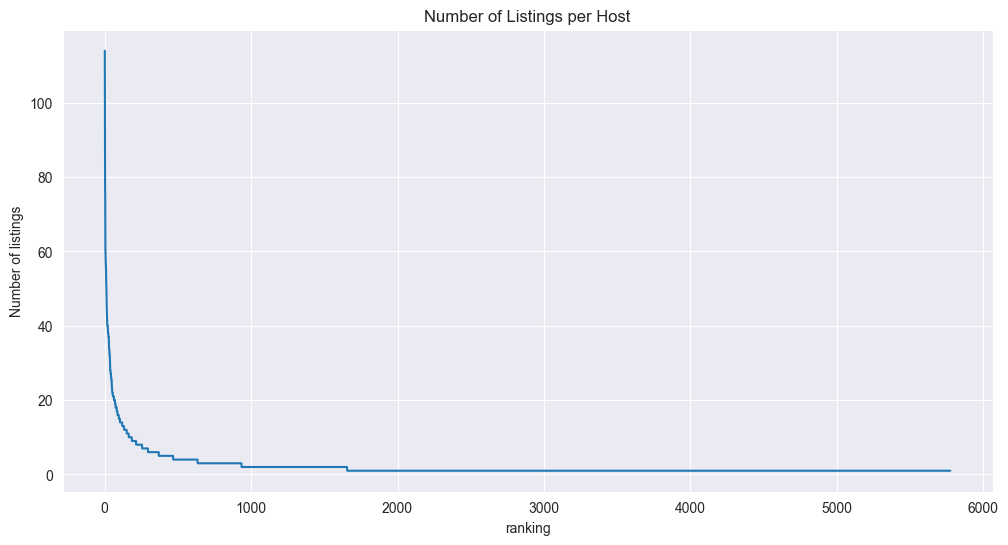

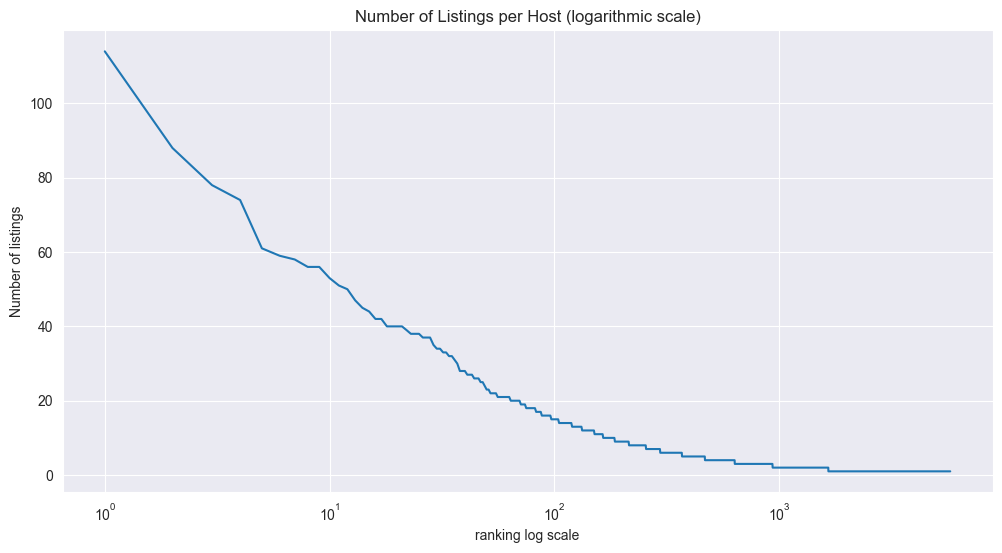

In [22]:
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

# Plot the data with a line plot with the rank on the x-axis and the count on the y-axis
plt.plot(listings_per_host['rank'], listings_per_host['count'], linestyle='-')

# Show the plot
plt.xlabel('ranking')
plt.ylabel('Number of listings')
plt.title('Number of Listings per Host')
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.plot(listings_per_host['rank'], listings_per_host['count'], linestyle='-')

# Show the plot
plt.xscale('log')  # Set the x-axis to a logarithmic scale
plt.xlabel('ranking log scale')
plt.ylabel('Number of listings')
plt.title('Number of Listings per Host (logarithmic scale)')
plt.grid(True)
plt.show()

## Task 8: Visualize Listings

This task requires us to draw an interactive map to show the listings ovelayed on Athens. The map should show each listing and on clicking on top of it, the user should see a short description of the listing.

For starters, we begin by initialising some necessary variables that will be needed in the process. We get the current date using the `datetime` and `.today()` method that get the current date in a `YYYY-MM-DD` format. Secondly we replace the new line characters with a `<br>` tag in the `name` column of the `listings` dataframe. After that we get the available listings for the current date  by checking the `date` column of the `calendar` dataframe for the current date and the `available` column for the value `t`. Lastly we create a map of Athens centered around the center of Athens using the `folium.Map()` function. We set the `location` parameter to the coordinates of Athens, the `zoom_start` parameter to 12, the `max_zoom` parameter to 15 and the `tiles` parameter to `OpenStreetMap` to easily load the map and its points without any performance issues.


In [23]:
# Get the current date
current_date = datetime.date.today()

# Replace the new line characters with a <br> tag
listings.name = listings.name.str.replace(r'\n', '<br>')

# get the available listings for the current date
available_listings = calendar[(calendar.date == current_date) & (calendar.available == 't')].listing_id

# Create a map of Athens centered around the center of Athens
athens_map = folium.Map(location=[37.9838, 23.7275], zoom_start=12, max_zoom=15, tiles='OpenStreetMap')

C:\Users\geoar\AppData\Local\Temp\ipykernel_10428\373291603.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  listings.name = listings.name.str.replace(r'\n', '<br>')


Continuing we start by creating a list to store the points for the convex hull that will be needed to draw in the map and using the **.iterrows()** function we iterate through the listings, the `index` variable keeps the index of the listing and the row `variable` creates a **Series** with the values of the listing. For each listing we get the latitude and longitude of the listing and add them to the `points` list. We then check if it is available on the current date and if it is we make it green or else red and create a `CircleMarker`for each listing with with a radius of 3 and the latitude and longitude of the listing as the center. We then create a `popup html` for each marker with the nessecary information for each listing. Lastly we create the **popup** using the `folium.Popup()` function and add it to the marker. We then add the marker to the map using the `add_to()` function.

In [24]:
# Create a list to store the points for the convex hull
points = []

#Itterate through the listings
for index, row in listings.iterrows():

    # Get the latitude and longitude of the listing
    lat, long = row.latitude, row.longitude

    # Add the latitude and longitude to the points list
    points.append([lat, long])

    # Create a CircleMarker for each listing if it is available on the current date make it green else red
    marker_color, avail = ('green', "Available") if row.id in available_listings.values else ('red', "Not Available")

    circle_marker = CircleMarker(location=(row.latitude, row.longitude), radius=3, fill=True, color= marker_color,
                        fill_color= marker_color, fill_opacity=1)


    # Create a popup for each marker with the nessecary information for each listing
    popup_html = f"""
                <h5>{row['name']}</h5>
                <p><strong>Availability Today:</strong> {avail}</p>
                <p><strong>Host:</strong> {row['host_name']}</p>
                <p><strong>Price:</strong> {row['price']} $</p>
                <hr style="border-top: 2px solid #333;"> <!-- Add a styled line to separate the price -->
                <p><strong>Neighbourhood:</strong> {row['neighbourhood_cleansed']}</p>
                <p><strong>Room Type:</strong> {row['room_type']}</p>
                <p><strong>Minimum Nights:</strong> {row['minimum_nights']}</p>
                <p><strong>Number of Reviews:</strong> {row['number_of_reviews']}</p>
            """
    popup = folium.Popup(popup_html, max_width=300)

    #Add the popup to the CircleMarker
    popup.add_to(circle_marker)

    # Add the CircleMarker to the marker cluster
    circle_marker.add_to(athens_map)

To create an outline of the general area of the map we need to store the points in a `numpy array` because the `ConvexHull` function requires a `numpy array` as an input. We then create a `ConvexHull` from the points and then create a `Polygon` outlier from the convex hull vertices. Lastly we add the polygon to the map using the `add_to()` function and save the map to an HTML file using the `save()` function.

In [25]:
# Create a convex hull from the points
points = np.array(points)
hull = ConvexHull(points)

# Create a polygon from the convex hull
polygon = Polygon(locations=points[hull.vertices].tolist(), color="blue", popup = None)

# Add the polygon to the map
polygon.add_to(athens_map)

# Save the map to an HTML file
athens_map.save('athens_map.html')

### Note: Make sure you have restarted the kernel. Also see the map you need to open the `athens_map.html` file, that is located in this directory, in a browser.